In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00


In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load=ctrl.Antecedent(np.arange(0,101,1),'load')
dirty_level=ctrl.Antecedent(np.arange(0,101,1),'dirty_level')
fabric_type=ctrl.Antecedent(np.arange(0,101,1),'fabric_type')
time=ctrl.Consequent(np.arange(0,61,1),'time')
water=ctrl.Consequent(np.arange(0,200,1),'water')

load['small']=fuzz.trimf(load.universe,[1,10,20])
load['medium']=fuzz.trimf(load.universe,[19,30,50])
load['large']=fuzz.trimf(load.universe,[45,80,100])

dirty_level['low']=fuzz.trimf(dirty_level.universe,[0,0,40])
dirty_level['medium']=fuzz.trimf(dirty_level.universe,[35,50,70])
dirty_level['high']=fuzz.trimf(dirty_level.universe,[65,90,100])

fabric_type['D']=fuzz.trimf(fabric_type.universe,[0,0,40])
fabric_type['M']=fuzz.trimf(fabric_type.universe,[30,50,80])
fabric_type['H']=fuzz.trimf(fabric_type.universe,[75,90,100])

time['short']=fuzz.trimf(time.universe,[5,10,20])
time['medium']=fuzz.trimf(time.universe,[15,30,40])
time['long']=fuzz.trimf(time.universe,[35,50,60])

water['low']=fuzz.trimf(water.universe,[10,50,90])
water['medium']=fuzz.trimf(water.universe,[80,100,120])
water['high']=fuzz.trimf(water.universe,[110,160,200])

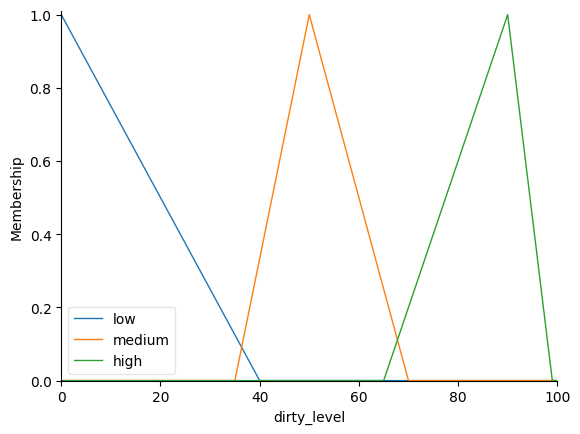

In [6]:
dirty_level.view()

In [16]:
rule1=ctrl.Rule(load['small']&dirty_level['low'],(time['short'],water['low']))
rule2=ctrl.Rule(load['small']&dirty_level['medium'],(time['medium'],water['medium']))
rule3=ctrl.Rule(load['small']&dirty_level['high'],(time['long'],water['high']))
rule4=ctrl.Rule(load['medium']&dirty_level['low'],(time['medium'],water['medium']))
rule5=ctrl.Rule(load['medium']&dirty_level['low'],(time['long'],water['medium']))
rule6=ctrl.Rule(load['medium']&dirty_level['high'],(time['long'],water['high']))
rule7=ctrl.Rule(load['large']&dirty_level['low'],(time['long'],water['high']))
rule8=ctrl.Rule(load['large']&dirty_level['medium'],(time['long'],water['high']))
rule9=ctrl.Rule(load['large']&dirty_level['high'],(time['long'],water['high']))
rule10=ctrl.Rule(load['large']&dirty_level['medium'],(time['long'],water['high']))
rule11=ctrl.Rule(fabric_type['D'],(time['short'],water['low']))
rule12=ctrl.Rule(fabric_type['M'],(time['medium'],water['medium']))
rule13=ctrl.Rule(fabric_type['H'],(time['long'],water['high']))
rule14=ctrl.Rule(load['large']&dirty_level['high']&fabric_type['H'],(time['long'],water['high']))
rule15=ctrl.Rule(load['small']&dirty_level['low']&fabric_type['D'],(time['short'],water['low']))
rule16=ctrl.Rule(load['medium']&dirty_level['medium']&fabric_type['M'],(time['medium'],water['medium']))

thời gian giặt: 34.27680798004986
lượng nước giặt: 130.30498022050773


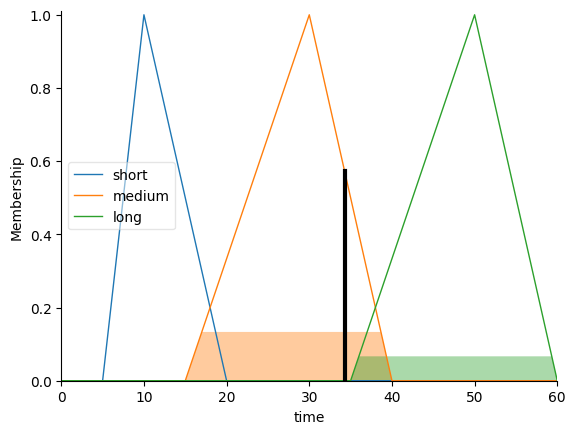

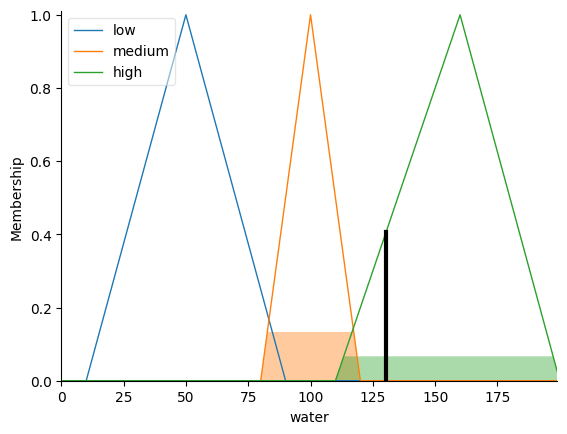

In [18]:
fuzzy_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
fuzzy_ctrl_sim=ctrl.ControlSystemSimulation(fuzzy_ctrl)
fuzzy_ctrl_sim.input['load']=99
fuzzy_ctrl_sim.input['dirty_level']=99
fuzzy_ctrl_sim.input['fabric_type']=76
fuzzy_ctrl_sim.compute()
print(f"thời gian giặt: {fuzzy_ctrl_sim.output['time']}")
print(f"lượng nước giặt: {fuzzy_ctrl_sim.output['water']}")
time.view(sim=fuzzy_ctrl_sim)
water.view(sim=fuzzy_ctrl_sim)